In [1]:
!pip install MiniSom

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [5]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len= 15, sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

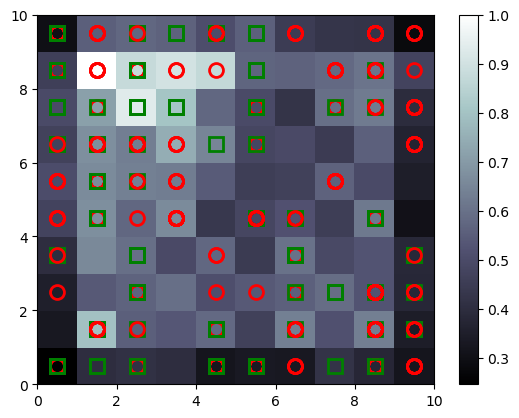

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(6,8)], mappings[(5,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15644446
15803378
15714087
15730793
15775750
15788776
15765257
15654859
15723827
15767231
15746995
15762716
15706464
15725028
15768474
15764444
15762045
15731989
15671534
15721569
15799859
15771409
15777893
15674750
15667460
15684512
15805212
15691150
15785339
15740458
15807546
15773869
15796111
15809800
15802071
15790630
15750055
15748499
15803682
15770406
15732943
15770255
15773789
15794868
15762392
15812470
15674583


In [ ]:
customers = dataset.iloc[:, 1:].values

In [ ]:
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [10]:
import tensorflow as tf


2023-09-25 13:16:11.902423: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 10)

Epoch 1/10
690/690 [==============================] - 1s 921us/step - loss: 1.0211 - accuracy: 0.4449
Epoch 2/10
690/690 [==============================] - 1s 943us/step - loss: 0.5365 - accuracy: 0.8536
Epoch 3/10
690/690 [==============================] - 1s 920us/step - loss: 0.3965 - accuracy: 0.9232
Epoch 4/10
690/690 [==============================] - 1s 911us/step - loss: 0.3335 - accuracy: 0.9290
Epoch 5/10
690/690 [==============================] - 1s 924us/step - loss: 0.2987 - accuracy: 0.9304
Epoch 6/10
690/690 [==============================] - 1s 908us/step - loss: 0.2786 - accuracy: 0.9304
Epoch 7/10
690/690 [==============================] - 1s 945us/step - loss: 0.2662 - accuracy: 0.9304
Epoch 8/10
690/690 [==============================] - 1s 920us/step - loss: 0.2581 - accuracy: 0.9304
Epoch 9/10
690/690 [==============================] - 1s 904us/step - loss: 0.2509 - accuracy: 0.9304
Epoch 10/10
690/690 [==============================] - 1s 908us/step - loss: 0.240

In [ ]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

In [ ]:
print(y_pred)